# <center> 👉 class_07_4 IP » _Image Inpainting - TELEA & NS_ </center>

https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html
https://ipolcore.ipol.im/demo/clientApp/demo.html?id=55&key=1AAEFF895943BA250B3A760AAAF0AF10  


We will see how we can repair damaged images in Python using inpainting methods of OpenCV.   
Image inpainting is the process of removing damage, such as noises, strokes, or text, on images.   
It is particularly useful in the restoration of old photographs which might have scratched edges or ink spots on them.   
These can be digitally removed through this method.

### ● Basics  
Most of you will have some old degraded photos at your home with some black spots, some strokes etc on it.   
Have you ever thought of restoring it back?   
We can't simply erase them in a paint tool because it is simply replace black structures with white structures which is of no use.   
In these cases, a technique called **image inpainting** is used.   

The basic idea is simple:   
- __Replace those bad marks with its neighbouring pixels__ so that it looks like the neighbourhood.  

Consider the image shown below :

<img src='./images/practice_img/inpainting1.jpg'  width=400 height=200>  

https://www.livemaster.ru/item/9606617-dizajn-i-reklama-vosstanovlenie-cherno-belyh-fotografij

Several algorithms were designed for this purpose and OpenCV provides two of them.  

The OpenCV library ships with two inpainting algorithms:

1. **cv2.INPAINT_TELEA:** An image inpainting technique based on the fast marching method (Telea, 2004)
2. **cv2.INPAINT_NS:** Navier-stokes, Fluid dynamics, and image and video inpainting (Bertalmío et al., 2001)

Both can be accessed by the same function, __cv.inpaint()__  
1. First algorithm is based on the paper **"An Image Inpainting Technique Based on the Fast Marching Method"** by Alexandru Telea in 2004.  
>- It is based on Fast Marching Method.   
>- Consider a region in the image to be inpainted.   
>- Algorithm starts from the boundary of this region and goes inside the region gradually filling everything in the boundary first.   
>- It takes a small neighbourhood around the pixel on the neighbourhood to be inpainted.   
>- This pixel is replaced by normalized weighted sum of all the known pixels in the neighbourhood.   
>- Selection of the weights is an important matter.   
>- More weightage is given to those pixels lying near to the point, near to the normal of the boundary and those lying on the boundary contours.   
>- Once a pixel is inpainted, it moves to next nearest pixel using Fast Marching Method.   
>>- FMM ensures those pixels near the known pixels are inpainted first, so that it just works like a manual heuristic operation.   
>- This algorithm is enabled by using the flag, cv.INPAINT_TELEA.

2. Second algorithm is based on the paper **"Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting"** by Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro in 2001.   
>- This algorithm is based on fluid dynamics and utilizes partial differential equations.   
>- Basic principle is heurisitic.   
>>- It first travels along the edges from known regions to unknown regions (because edges are meant to be continuous).   
>>- It continues isophotes (lines joining points with same intensity, just like contours joins points with same elevation) while matching gradient vectors at the boundary of the inpainting region.   
>>- For this, some methods from fluid dynamics are used. Once they are obtained, color is filled to reduce minimum variance in that area.   
>- This algorithm is enabled by using the flag, cv.INPAINT_NS.

✓ Code
When applying inpainting with OpenCV, we need to provide two images:
- The input image we wish to inpaint and restore. Presumably, this image is “damaged” in some manner, and we need to apply inpainting algorithms to fix it  
- The mask image, which indicates where in the image the damage is.   
>= This image should have the same spatial dimensions (width and height) as the input image.   
>= Non-zero pixels correspond to areas that should be inpainted (i.e., fixed), while zero pixels are considered “normal”and do not need inpainting

We need to create a mask of same size as that of input image, where non-zero pixels corresponds to the area which is to be inpainted.   
Everything else is simple. My image is degraded with some black strokes (I added manually).   
I created a corresponding strokes with Paint tool.

In [1]:
# Making Mask of the original img
import cv2
import numpy as np

damaged_img = cv2.imread('./images/practice_img/inpainting2.jpg') # reading the damaged image
height, width = damaged_img.shape[0], damaged_img.shape[1] # get the shape of the image
height,width

(281, 376)

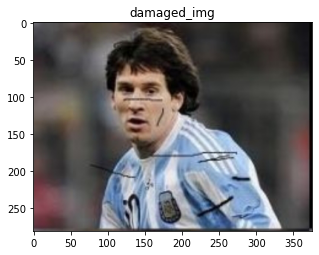

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('damaged_img')
plt.show()

In [4]:
# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]

mask = damaged_img
cv2.imwrite('./images/practice_img/inpainting21_mask.jpg', mask) # saving the mask
cv2.imshow("damaged image mask", mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import numpy as np
import cv2 as cv 

def same_size(img1_path, img2_path):
    img1 = cv2.imread(img1_path) 
    img2 = cv2.imread(img2_path)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    return img1,img2
img1_path = './images/practice_img/inpainting2.jpg'
img2_path = './images/practice_img/inpainting21.jpg'
img1,img2 = same_size(img1_path, img2_path)

In [6]:
img2.shape

(281, 376, 3)

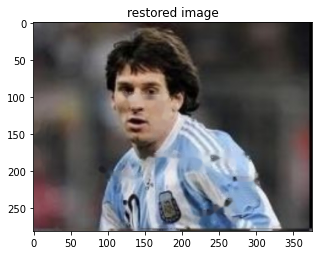

In [7]:
# img = cv.imread('./images/practice_img/inpainting2.jpg')
# mask = cv.imread('./images/practice_img/inpainting21.jpg', cv.IMREAD_GRAYSCALE)
mask = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
dst = cv.inpaint(img1,mask,3,cv.INPAINT_TELEA)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('restored image')
plt.show()

At this point, the big question is:  
    
How do we create the mask for inpainting with OpenCV?  
“Adrian, how did you create the mask? Was that created programmatically?  
Or did you manually create it?” 
I had to manually create the mask.   
To do so, I opened up Photoshop (GIMP or another photo editing/manipulation tool would work just as well), and then used the Magic Wand tool and manual selection tool to select the damaged areas of the image.  
I then flood-filled the selection area with white, left the background as black, and saved the mask to disk.  

Doing so was a manual, tedious process — you may be able to programmatically define masks for your own images using image processing techniques such as thresholding, edge detection, and contours to mark damaged reasons, but realistically, there will likely be some sort of manual intervention.  
The manual intervention is one of the primary limitations of using OpenCV's built-in inpainting algorithms.

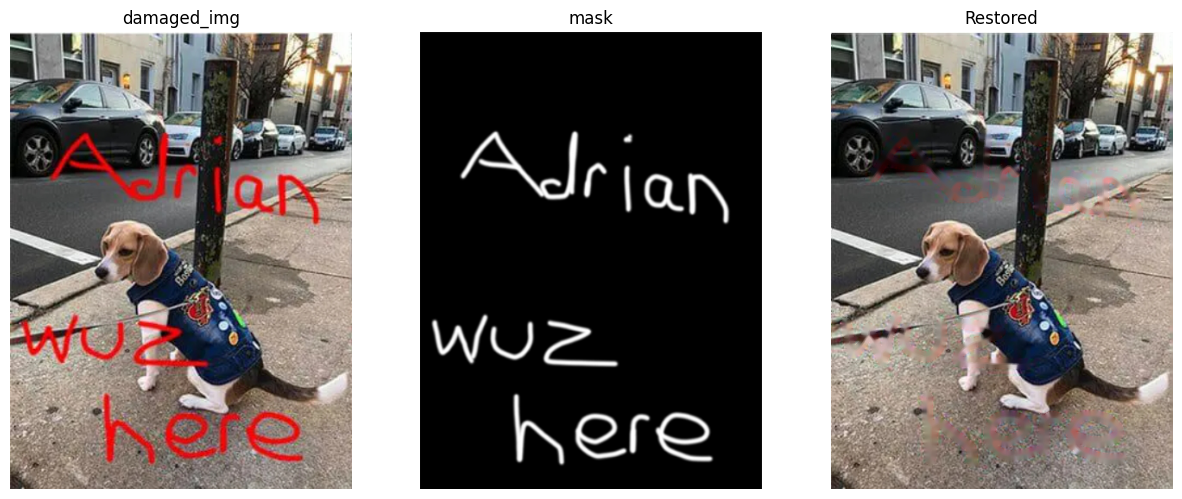

In [7]:
# Making Mask of the original img
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

damaged_img = cv2.imread('./images/practice_img/inpainting31.jpg') # reading the damaged image
height, width = damaged_img.shape[0], damaged_img.shape[1] # get the shape of the image
mask = cv2.imread('./images/practice_img/inpainting32.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (damaged_img.shape[1], damaged_img.shape[0]))
dst = cv2.inpaint(damaged_img,mask,3,cv2.INPAINT_TELEA)
 
# cv2.imshow("damaged image mask", mask)
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB)),plt.title('damaged_img'),plt.axis('off')
plt.subplot(132),plt.imshow(mask, cmap='gray'),plt.title('mask'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Restored'),plt.axis('off')
plt.show()

To detect red, you can use a HSV color thresholder script to determine the lower/upper thresholds then cv2.bitwise_and() to obtain the mask. Using this input image,
You can get the mask and result image

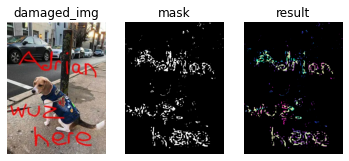

In [12]:
import numpy as np
import cv2

image = cv2.imread('./images/practice_img/inpainting31.jpg')
image_org = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([155,25,0])
upper = np.array([179,255,255])
mask2 = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(image, image, mask=mask2)

# cv2.imshow('mask', mask)
# cv2.imshow('result', result)
# cv2.waitKey()
plt.subplot(131),plt.imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB)),plt.title('damaged_img'),plt.axis('off')
plt.subplot(132),plt.imshow(mask2, cmap='gray'),plt.title('mask'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)),plt.title('result'),plt.axis('off')
plt.show()